In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split

# Will use for feature scaling
from sklearn.preprocessing import MinMaxScaler

# To evaluate the model performance
from sklearn import metrics

# To visualize the results
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Activation 
from tensorflow.keras.layers import Dense,Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [30]:
# Importing Dataset
dataset = pd.read_csv("creditcard.csv")
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [31]:
dataset.shape

(284807, 31)

In [32]:
# Printing the basic information of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [33]:
# Examiming the dataset
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [34]:
# Checking if the dataset has any null values
dataset.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
# Summing up all available null values
dataset.isnull().sum()
# Comments on Result: Here all columns have 0 null values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [36]:
# Will check if there is any duplicate row in the dataset
dataset.duplicated().sum()

1081

In [37]:
# distribution of legit transactions & fraudulent transactions
dataset['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [38]:
# separating the data into class legit & fraud
legit = dataset[dataset.Class == 0]
legit.shape

(284315, 31)

In [39]:
fraud = dataset[dataset.Class == 1]
fraud.shape

(492, 31)

In [62]:
# Dropping Irrelevent column(Serial No.) from Dataset
X = dataset.drop("Class", axis = 1)
X

(284807, 30)

In [41]:
y = dataset["Class"]
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [42]:
# Spilitting the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train, X_test, y_train, y_test

(            Time        V1        V2        V3        V4        V5        V6  \
 13367    23610.0  1.387525 -0.547811  0.076422 -0.739334 -0.519887 -0.026007   
 31788    36516.0  1.021179 -0.194114  1.207791  1.738369 -0.659824  0.631864   
 84796    60465.0 -1.134453  0.636843  2.457241  1.317848  0.605755  0.143546   
 6243      7309.0 -0.851343  0.062000  1.406917 -1.669375  0.462639 -0.150804   
 162432  115111.0 -0.040314  0.545458  0.831788 -0.515723  0.128584 -0.112466   
 ...          ...       ...       ...       ...       ...       ...       ...   
 21440    31666.0 -2.986845 -8.663978 -1.910863  0.664058 -3.934875  0.861269   
 117583   74729.0  0.937083 -0.849673  0.524186 -0.020031 -0.606327  0.692302   
 73349    55095.0 -1.149963  1.696462  1.637114  2.658991 -0.021502  0.192287   
 267336  162728.0  1.754554 -0.699398 -0.076332  0.443915 -0.672082  0.389061   
 128037   78576.0 -0.707635  0.493302  2.648089  1.064807 -0.680271  1.183838   
 
               V7        V

In [43]:
#Fearure Scaling

#scaler = StandardScaler() 
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train, X_test

(array([[1.36638270e-01, 9.81866109e-01, 7.61478151e-01, ...,
         4.14728672e-01, 3.12822591e-01, 1.22026409e-03],
        [2.11329228e-01, 9.75642341e-01, 7.65210182e-01, ...,
         4.18194066e-01, 3.13853593e-01, 1.60716760e-03],
        [3.49929395e-01, 9.39020829e-01, 7.73978001e-01, ...,
         4.17567601e-01, 3.15213258e-01, 9.05759024e-04],
        ...,
        [3.18851567e-01, 9.38757325e-01, 7.85158545e-01, ...,
         4.13519943e-01, 3.13756862e-01, 2.95043120e-04],
        [9.41756563e-01, 9.88101473e-01, 7.59878682e-01, ...,
         4.16402921e-01, 3.12725673e-01, 3.68998519e-03],
        [4.54743275e-01, 9.46271935e-01, 7.72463435e-01, ...,
         4.09393866e-01, 3.08951833e-01, 2.24980110e-03]]),
 array([[6.93938377e-01, 9.47901548e-01, 7.59136839e-01, ...,
         4.17738416e-01, 3.17612278e-01, 6.96737711e-05],
        [4.53377471e-01, 9.44453344e-01, 7.81178076e-01, ...,
         4.19508990e-01, 3.14330415e-01, 7.70693110e-05],
        [4.76769758e-01, 

# Traditional Machine Learning Algorithms

# Support Vectore Machine

In [135]:
# Support Vector Classification Model
from sklearn.svm import SVC

svm_classifier = SVC(C=10)

# Training the model
svm_classifier.fit(X_train, y_train)

# Predicting the results for trained support vector classifier
y_pred_svc = svm_classifier.predict(X_test)

# Calculating accuracies for support vector classifier
accuracy_svc = metrics.accuracy_score(y_test, y_pred_svc) * 100
print(f'Accuracy of Support Vector Classification Model : {accuracy_svc} %')

Accuracy of Support Vector Classification Model : 99.9403110845827 %


Confusion Matrix of Support Vector Classifier : 
[[56863    12]
 [   22    65]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.84      0.75      0.79        87

    accuracy                           1.00     56962
   macro avg       0.92      0.87      0.90     56962
weighted avg       1.00      1.00      1.00     56962



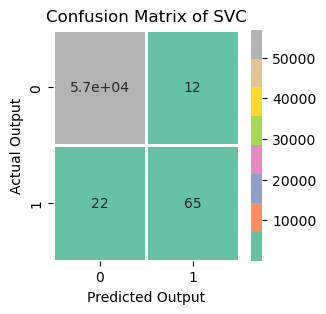

In [136]:
# Confusion Matrix of Suport Vector Classifier
cnm_svc = metrics.confusion_matrix(y_test, y_pred_svc)

print(f'Confusion Matrix of Support Vector Classifier : \n{cnm_svc}')
print(sklearn.metrics.classification_report(y_test, y_pred_svc))

# Plotting the confusion matrix
f, axes = plt.subplots(figsize =(3,3))
sns.heatmap(cnm_svc, annot = True, linewidths=1.0, linecolor="white", ax=axes, cmap = 'Set2')
plt.title("Confusion Matrix of SVC")
plt.xlabel("Predicted Output")
plt.ylabel("Actual Output")
plt.show()

# Gradient Boosting

In [137]:
# Gradient Boosting Classification Model
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=50)

# Training the model
gb_classifier.fit(X_train, y_train)

# Predicting results for Gradient Boosting Classifier
y_pred_gbc = gb_classifier.predict(X_test)

# Calculating accuracies for Gredient boosting Classifier
accuracy_gbc = metrics.accuracy_score(y_test, y_pred_gbc) * 100
print(f'Accuracy of Gradient Boosting Classification Model : {accuracy_gbc} %')

Accuracy of Gradient Boosting Classification Model : 99.93153330290369 %


Confusion Matrix of Support Vector Classifier : 
[[56863    12]
 [   22    65]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.88      0.64      0.74        87

    accuracy                           1.00     56962
   macro avg       0.94      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962



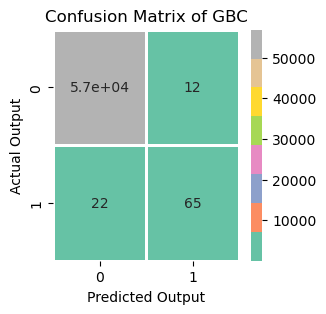

In [138]:
# Confusion Matrix of Suport Vector Classifier
cnm_svc = metrics.confusion_matrix(y_test, y_pred_svc)

print(f'Confusion Matrix of Support Vector Classifier : \n{cnm_svc}')
print(sklearn.metrics.classification_report(y_test, y_pred_gbc))

# Plotting the confusion matrix
f, axes = plt.subplots(figsize =(3,3))
sns.heatmap(cnm_svc, annot = True, linewidths=1.0, linecolor="white", ax=axes, cmap = 'Set2')
plt.title("Confusion Matrix of GBC")
plt.xlabel("Predicted Output")
plt.ylabel("Actual Output")
plt.show()

# Neural Network

# DenseNet

In [79]:
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],1), activation='relu'))
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.2))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.summary()

model.compile(optimizer=Adam(learning_rate=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 30, 128)           256       
                                                                 
 dropout_8 (Dropout)         (None, 30, 128)           0         
                                                                 
 dense_17 (Dense)            (None, 30, 64)            8256      
                                                                 
 dropout_9 (Dropout)         (None, 30, 64)            0         
                                                                 
 dense_18 (Dense)            (None, 30, 64)            4160      
                                                                 
 dropout_10 (Dropout)        (None, 30, 64)            0         
                                                                 
 dense_19 (Dense)            (None, 30, 64)          

In [80]:
model_history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
5697/5697 [==============================] - 72s 12ms/step - loss: 0.0183 - accuracy: 0.9979 - val_loss: 0.0103 - val_accuracy: 0.9982
Epoch 2/10
5697/5697 [==============================] - 71s 12ms/step - loss: 0.0066 - accuracy: 0.9986 - val_loss: 0.0062 - val_accuracy: 0.9989
Epoch 3/10
5697/5697 [==============================] - 73s 13ms/step - loss: 0.0051 - accuracy: 0.9991 - val_loss: 0.0052 - val_accuracy: 0.9990
Epoch 4/10
5697/5697 [==============================] - 80s 14ms/step - loss: 0.0047 - accuracy: 0.9991 - val_loss: 0.0051 - val_accuracy: 0.9990
Epoch 5/10
5697/5697 [==============================] - 88s 15ms/step - loss: 0.0048 - accuracy: 0.9991 - val_loss: 0.0051 - val_accuracy: 0.9990
Epoch 6/10
5697/5697 [==============================] - 100s 18ms/step - loss: 0.0046 - accuracy: 0.9991 - val_loss: 0.0049 - val_accuracy: 0.9990
Epoch 7/10
5697/5697 [==============================] - 83s 15ms/step - loss: 0.0046 - accuracy: 0.9991 - val_loss: 0.0053 

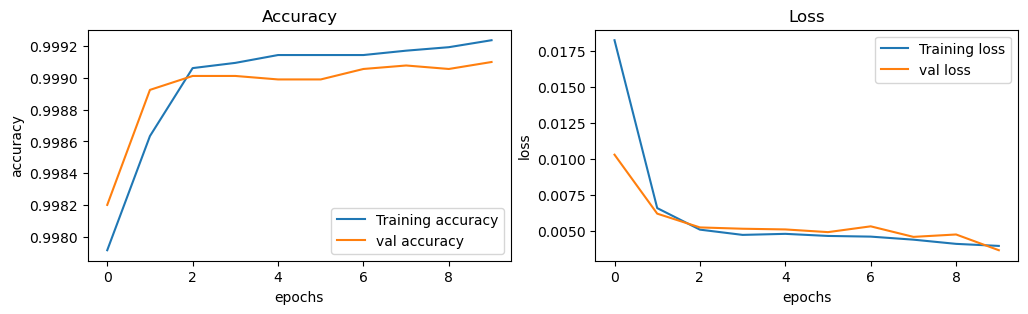

In [92]:
# Plotting accuracy
plt.figure(figsize=(12, 3))

plt.subplot(121)
plt.plot(model_history.history['accuracy'], label='Training accuracy')
plt.plot(model_history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

# Plotting loss
plt.subplot(122)
plt.plot(model_history.history['loss'], label='Training loss')
plt.plot(model_history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [141]:
# Predicting results for test dataset
predict = np.argmax(model.predict(X_test), axis=-1)

accuracy = accuracy_score(y_test, predict)*100
print("Test Accuracy of model:",accuracy)

1781/1781 [==============================] - 9s 5ms/step
Test Accuracy of model: 99.92626663389628


# CNN

In [129]:
cnn_model=Sequential()
    
cnn_model.add(Conv1D(filters=64, kernel_size = (3), activation="relu", input_shape=(X_train.shape[1],1)))
#cnn_model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
cnn_model.add(MaxPooling1D(pool_size=(2)))

cnn_model.add(Conv1D(filters=128, kernel_size = (3), activation="relu"))
#cnn_model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
cnn_model.add(MaxPooling1D(pool_size=(2)))  
    
cnn_model.add(Flatten(input_shape=(28,28)))
cnn_model.add(Dense(256,activation="relu"))
    
cnn_model.add(Dense(10,activation="softmax"))
    
optimizer2 = tf.keras.optimizers.Adam(0.01)    
cnn_model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 28, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 14, 64)           0         
 )                                                               
                                                                 
 conv1d_4 (Conv1D)           (None, 12, 128)           24704     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 6, 128)           0         
 1D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 768)               0         
                                                                 
 dense_28 (Dense)            (None, 256)             

In [130]:
cnn_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer2, metrics=["accuracy"])

In [132]:
cnn_history = cnn_model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
5697/5697 [==============================] - 73s 12ms/step - loss: 0.0180 - accuracy: 0.9981 - val_loss: 0.0134 - val_accuracy: 0.9982
Epoch 2/10
5697/5697 [==============================] - 68s 12ms/step - loss: 0.0133 - accuracy: 0.9982 - val_loss: 0.0132 - val_accuracy: 0.9982
Epoch 3/10
5697/5697 [==============================] - 66s 12ms/step - loss: 0.0266 - accuracy: 0.9977 - val_loss: 0.0133 - val_accuracy: 0.9982
Epoch 4/10
5697/5697 [==============================] - 69s 12ms/step - loss: 0.0134 - accuracy: 0.9982 - val_loss: 0.0138 - val_accuracy: 0.9982
Epoch 5/10
5697/5697 [==============================] - 65s 11ms/step - loss: 0.0132 - accuracy: 0.9982 - val_loss: 0.0133 - val_accuracy: 0.9982
Epoch 6/10
5697/5697 [==============================] - 68s 12ms/step - loss: 0.0132 - accuracy: 0.9982 - val_loss: 0.0133 - val_accuracy: 0.9982
Epoch 7/10
5697/5697 [==============================] - 73s 13ms/step - loss: 0.0132 - accuracy: 0.9982 - val_loss: 0.0132 -

In [142]:
# Predicting results for test dataset
cnn_predict = np.argmax(cnn_model.predict(X_test), axis=-1)

cnn_accuracy = accuracy_score(y_test, cnn_predict)*100
print("Test Accuracy of CNN model:",cnn_accuracy)

1781/1781 [==============================] - 7s 4ms/step
Test Accuracy of CNN model: 99.84726659878515


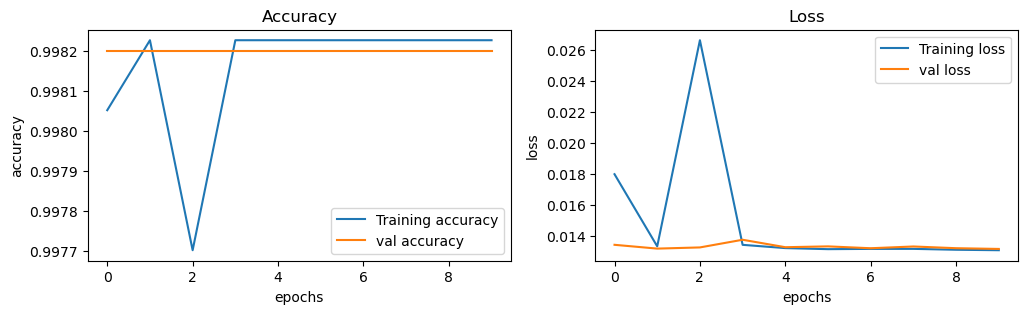

In [140]:
# Plotting accuracy
plt.figure(figsize=(12, 3))

plt.subplot(121)
plt.plot(cnn_history.history['accuracy'], label='Training accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

# Plotting loss
plt.subplot(122)
plt.plot(cnn_history.history['loss'], label='Training loss')
plt.plot(cnn_history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

# Comparison of different models

In [143]:
# Comparing the accuracies of all the classifiers used so far on a table
final_result = pd.DataFrame({'Models' : ['SVM','Gradient Boosting', 'DenseNet', 'CNN'],
                                  'Accuracies' : [accuracy_svc, accuracy_gbc, accuracy, cnn_accuracy]})
final_result

,Models,Accuracies
0,SVM,99.940311
1,Gradient Boosting,99.931533
2,DenseNet,99.926267
3,CNN,99.847267


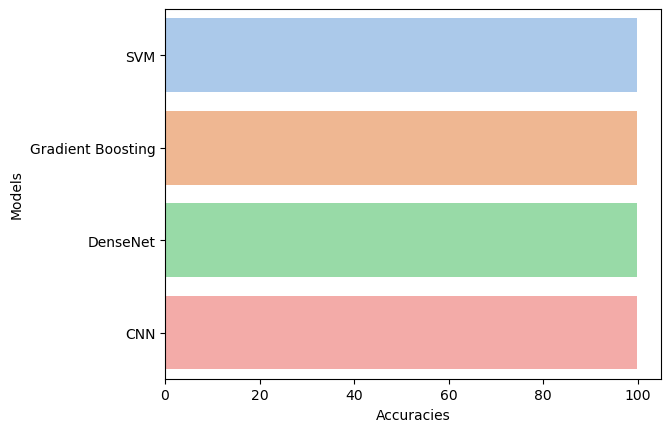

In [144]:
with sns.color_palette("pastel"):
    sns.barplot(y = final_result['Models'], x = final_result['Accuracies'])